<h1 style="color: white; 
    font-size: 46px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px; 
    ">Image Binary Classification</h1>

In [1]:
#!pip install tensorflow==2.0.0-alpha0 

import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">Load the data</h1>

- Data Source: https://storage.googleapis.com/laurencemoroney-blog.appspot.com/
- Training set: 500 horse images and 527 human images
- Validation set: 

In [6]:
DATA_URLS = ['https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip']
DIR_NAME = 'horse-vs-human'
    
DATA_FILE_EXT = '.zip'
DATA_DIR_PATH = './data/' + DIR_NAME

In [4]:
DATA_URLS = ['https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip']
DIR_NAME = 'validation-horse-vs-human'

DATA_FILE_EXT = '.zip'
DATA_DIR_PATH = './data/' + DIR_NAME

In [7]:
# !pip install wget

import os
import wget
import zipfile
import tarfile

def download_wget(URLS, FILE_EXT, DIR_PATH):
    for url in URLS:
        target_file = url.split('/')[-1]
        if target_file not in os.listdir(DIR_PATH):
            print('Downloading', url)
            wget.download(url, out=DIR_PATH)
            file_path = os.path.join(DIR_PATH, target_file)
            
            print('\n \nExtracting files from', file_path)
            if FILE_EXT == '.zip':
                zip_ref = zipfile.ZipFile(file_path,'r')
                zip_ref.extractall(DIR_PATH)
                zip_ref.close()
                os.remove(file_path)
            elif FILE_EXT == '.tar.gz':
                tar_ref = tarfile.open(file_path,'r:gz')
                tar_ref.extractall(DIR_PATH)
                tar_ref.close()
                os.remove(file_path)
            elif FILE_EXT == '.tar.bz2':
                tar_ref = tarfile.open(file_path,'r:bz2')
                tar_ref.extractall(DIR_PATH)
                tar_ref.close()
                os.remove(file_path)
            print('\nDone!')
        else:
            print('Already downloaded', url)


if not os.path.isdir('data'):
    os.mkdir('data')    
    
if not os.path.isdir('data/' + DIR_NAME):
    os.mkdir('data/' + DIR_NAME)              

    
download_wget(DATA_URLS, DATA_FILE_EXT, DATA_DIR_PATH)

100% [..................................................] 149574867 / 149574867
 
Extracting files from ./data/horse-vs-human\horse-or-human.zip

Done!


<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">Vizualize the data</h1>

- Print file names
- Print the total number of training images
- Print the total number of validation images
- Display a batch of 8 horse images and 8 human images

In [10]:
# Create variables with the names of the directories
class1 = 'horses'
class2 = 'humans'

train_dir = 'horse-vs-human'
validation_dir = 'validation-horse-vs-human'

train_dir_path = './data/'+ train_dir + '/'
validation_dir_path = './data/'+ validation_dir + '/'

# Directories with the training images
train_class1_dir = os.path.join('./data/'+ train_dir + '/' + class1)
train_class2_dir = os.path.join('./data/'+ train_dir + '/' + class2)

# Directories with the validation images
validation_class1_dir = os.path.join('./data/'+ validation_dir + '/' + class1)
validation_class2_dir = os.path.join('./data/'+ validation_dir + '/' + class2)

In [11]:
# See what the file names look like
print('File names:')

train_class1_names = os.listdir(train_class1_dir)
print(train_class1_names[:5])

train_class2_names = os.listdir(train_class2_dir)
print(train_class2_names[:5])

validation_class1_names = os.listdir(validation_class1_dir)
print(validation_class1_names[:5])

validation_class2_names = os.listdir(validation_class2_dir)
print(validation_class2_names[:5])

File names:
['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png']

 Total training horse images: 500
Total training human images: 527

 Total validation horse images: 128
Total validation human images: 128


In [ ]:
# Total number of training pictures
print('\nTotal training horse images:', len(os.listdir(train_class1_dir)))
print('Total training human images:', len(os.listdir(train_class2_dir)))

# Total number of training pictures
print('\nTotal validation horse images:', len(os.listdir(validation_class1_dir)))
print('Total validation human images:', len(os.listdir(validation_class2_dir)))

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

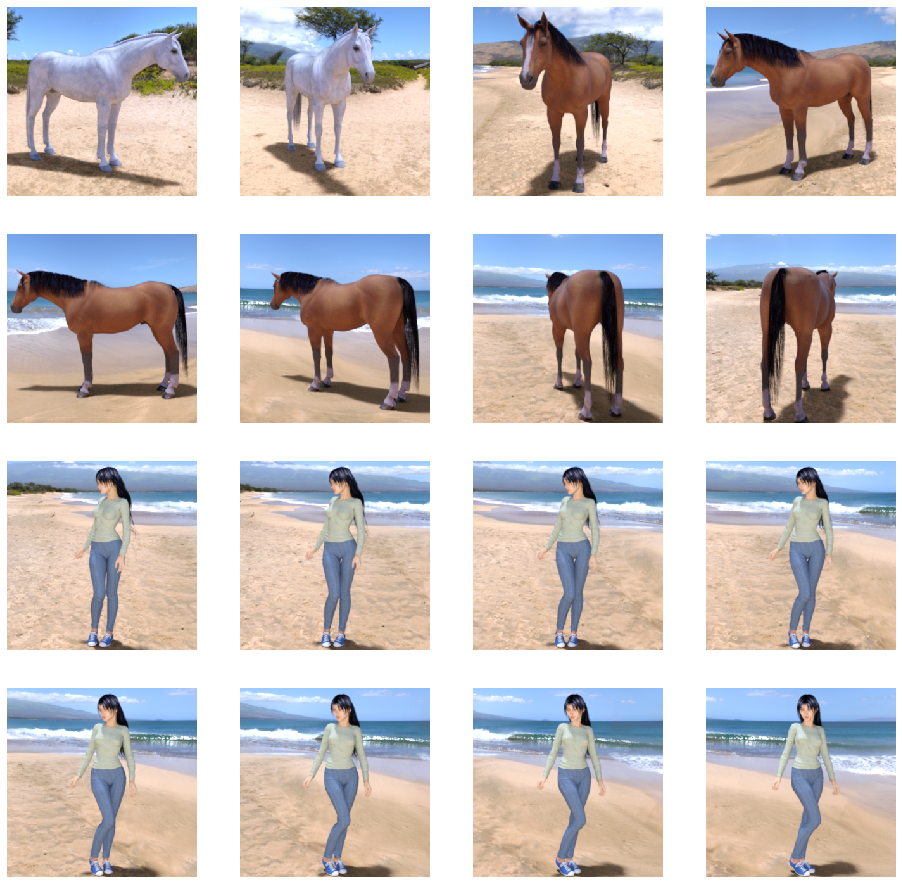

In [10]:
# Parameters for the graph, we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_class1_pix = [os.path.join(train_class1_dir, fname) 
                for fname in train_class1_names[pic_index-8:pic_index]]
next_class2_pix = [os.path.join(train_class2_dir, fname) 
                for fname in train_class2_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_class1_pix+next_class2_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">Preprocess the data</h1>

# Image Data Generator

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via ```.flow(data, labels)``` or ```.flow_from_directory(directory)```. 

These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if not train_dir_path:
    train_dir_path = './data/'+ train_dir + '/'
    validation_dir_path = './data/'+ validation_dir + '/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir_path,                             # Source directory for training images
        target_size=(300, 300),                     # All images will be resized to 300x300
        batch_size=128,
        class_mode='binary'                         # Since we use binary_crossentropy loss, we need binary labels
)

# Flow validation images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir_path,                        # Source directory for validation images
        target_size=(300, 300),                     # All images will be resized to 300x300
        batch_size=32,
        class_mode='binary'                         # Since we use binary_crossentropy loss, we need binary labels
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">The model</h1>

# Create a CNN

Convolution and Pooling are used to improve our image recognition performance.

## - Convolution
Technique to **isolate features** in images.

By passing filters over an image to reduce the amount of information, they then allowed the neural network to effectively extract features that can distinguish one class of image from another. 

**Output shape:** After passing a 3x3 filter over a 28x28 image, the output will be 26x26.

## - Pooling 
Technique to reduce the information in an image while maintaining features.

Pooling **compresses the information** to make it more manageable. 

**Output shape:** After max pooling a 26x26 image with a 2x2 filter, the output will be 13x13.

In [12]:
# images 300x300 with 3 bytes color
# binary classification problem => sigmoid

model = tf.keras.models.Sequential([
    
    # Convolutions
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model

Build the model compiling it with an optimizer and loss function.

In [13]:
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train de model

Train the model calling model.fit asking it to fit your training data to your training labels.

To see how the model would work with unseen data we can call model.evaluate and pass in the test data, it will report back the loss for each

In [14]:
# Data Image Generator

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 103s 13s/step - loss: 0.6816 - accuracy: 0.5784 - val_loss: 0.4957 - val_accuracy: 0.8672
Epoch 2/15
8/8 [==============================] - 88s 11s/step - loss: 0.3050 - accuracy: 0.9033 - val_loss: 0.7214 - val_accuracy: 0.8828
Epoch 3/15
8/8 [==============================] - 82s 10s/step - loss: 0.2362 - accuracy: 0.9444 - val_loss: 0.4568 - val_accuracy: 0.9141
Epoch 4/15
8/8 [==============================] - 84s 10s/step - loss: 0.1172 - accuracy: 0.9455 - val_loss: 1.0615 - val_accuracy: 0.8398
Epoch 5/15
8/8 [==============================] - 71s 9s/step - loss: 0.0649 - accuracy: 0.9703 - val_loss: 1.9656 - val_accuracy: 0.8008
Epoch 6/15
8/8 [==============================] - 92s 12s/step - loss: 0.0525 - accuracy: 0.9805 - val_loss: 2.1072 - val_accuracy: 0.8125
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 1.7864 - val_accuracy: 0.8320
Epoch 8/15
8/8 [===========

# Make predictions

In [77]:
import numpy as np
from keras.preprocessing import image

files = ['horse1.png', 'man1.jpg', 'man2.jpg']

for file in files:
    path = './data/predict/' + file 
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]<0.5:
        print(file + " is a " + class1)
    else:
        print(file + " is a " + class2)

[0.]
horse1.png is a horses
[6.5064353e-29]
man1.jpg is a horses
[1.]
man2.jpg is a humans


# Save the model

Call ```model.save``` to save a model's architecture, weights, and training configuration in a single file/folder. 

This allows you to export a model so it can be used without access to the original Python code*. Since the optimizer-state is recovered, you can resume training from exactly where you left off.

An entire model can be saved in two different file formats (SavedModel and HDF5). The TensorFlow SavedModel format is the default file format in TF2.x. However, models can be saved in HDF5 format.

## - SavedModel

Models saved in this format can be restored using tf.keras.models.load_model and are compatible with TensorFlow Serving. 

In [19]:
# Save the entire model as a SavedModel
if not os.path.isdir('saved_model'):
    os.mkdir('saved_model') 

model_save_path = os.path.join('./saved_model/')
tf.saved_model.save(model, model_save_path)

INFO:tensorflow:Assets written to: ./saved_model/assets
